**Classification of XRays using Machine Learning**
---
My name is Teddy John Kamau Mbiri, a final year Computer Science student at University of West London. 
This is my final year project, the use of Machine Learning to classify X-rays, whether a patient has pneumonia, covid pneumonia or neither.


**Data Exploration**
---
The section below will explore the data and the features of the dataset.
I will be using data from multiple sources and previous work to create a model that can classify X-rays.

**Data Source**
1.	https://drive.google.com/drive/folders/128hxYxQ8kVEkSkVGikueiqBxWTmDIW2h
2.	https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia
3.	https://www.kaggle.com/nikhilpandey360/chest-xray-masks-and-labels
4.  https://data.mendeley.com/datasets/jctsfj2sfn/1
5. https://www.rsna.org/education/ai-resources-and-training/ai-image-challenge/rsna-pneumonia-detection-challenge-2018



In [1]:
#split the data into train and test and validation 
#import splitfolders
#Library required for the splitfolders function
#splitfolders.ratio("C:/Users/tedjo/Pictures/XRays", output="C:/Users/tedjo/Pictures/XRays/SplitData", seed=1337, ratio=(.8, .1, .1))
#SplitData is the folder where the data will be stored

In [2]:
#After the data is split and stored in the SplitData folder, the next step is to explore the data.
#import required libraries and there functions within my code
import pandas as pd #dataframe
import numpy as np #numerical python
import matplotlib.pyplot as plt #plotting 
import seaborn as sns #plotting
import os #operating system
from tensorflow.keras.preprocessing import image #image processing

Text(0, 0.5, 'Count')

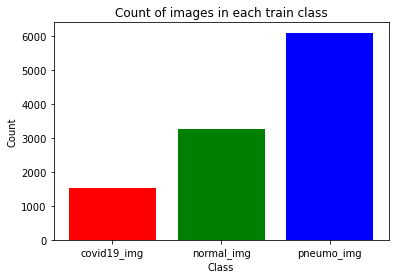

In [3]:
#After splitting the images into separate folders plotting a histogram of the images in the folders will help identfiy imbalance in the classes
#First is creating a dictionary to store the number of images in each folder
#Import the data from the train folder
train_path = "C:/Users/tedjo/OneDrive/Pictures/XRays/SplitData/train"
Xray_classes = {'covid19_img': len(os.listdir(f'{train_path}/COVID19')),
                'normal_img': len(os.listdir(f'{train_path}/NORMAL')),
                'pneumo_img': len(os.listdir(f'{train_path}/PNEUMONIA'))}

#Plotting the histogram of the images in the folders
plt.bar(Xray_classes.keys(), Xray_classes.values(),color=['red','green','blue'])
plt.title('Count of images in each train class')
plt.xlabel('Class')
plt.ylabel('Count')

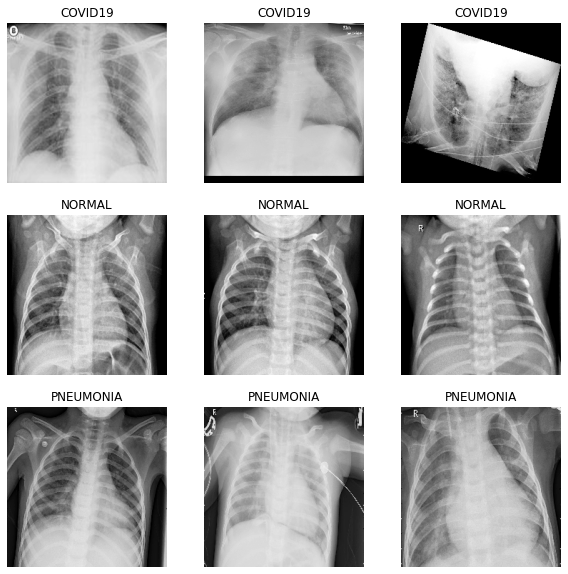

In [4]:
#Import the data from the train folder
train_path = "C:/Users/tedjo/OneDrive/Pictures/XRays/SplitData/train"

#Create a list of all the images in the train folder
covid19_img = [fn for fn in os.listdir(f'{train_path}/COVID19') if fn.endswith('.jpg')]
normal_img = [fn for fn in os.listdir(f'{train_path}/NORMAL') if fn.endswith('.jpg')]
pneumo_img = [fn for fn in os.listdir(f'{train_path}/PNEUMONIA') if fn.endswith('.jpg')]

#Select 3 random images from each class to display from the train folder
covid_img = np.random.choice(covid19_img, 3, replace = False)
normal_img = np.random.choice(normal_img, 3, replace = False)
pneumo_img = np.random.choice(pneumo_img, 3, replace = False)

#PLot a matrix of the images
fig = plt.figure(figsize=(10,10))
for i in range(9):
    if i < 3: 
        fp = f'{train_path}/COVID19/{covid_img[i]}'
        label = 'COVID19'
    elif i>=3 and i<6:
        fp = f'{train_path}/NORMAL/{normal_img[i-3]}'
        label = 'NORMAL'
    else:
        fp = f'{train_path}/PNEUMONIA/{pneumo_img[i-6]}'
        label = 'PNEUMONIA'
    ax = fig.add_subplot(3,3,i+1)
    
    #Load the image
    fn = image.load_img(fp, target_size=(224,224), color_mode='grayscale')
    plt.imshow(fn,cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()




Text(0, 0.5, 'Count')

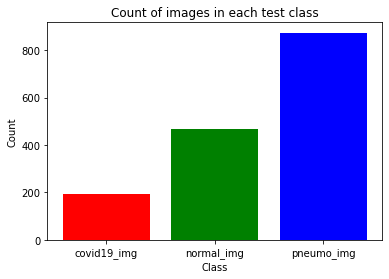

In [5]:
test_path = "C:/Users/tedjo/OneDrive/Pictures/XRays/SplitData/test"
Xray_classes = {'covid19_img': len(os.listdir(f'{test_path}/COVID19')),
                'normal_img': len(os.listdir(f'{test_path}/NORMAL')),
                'pneumo_img': len(os.listdir(f'{test_path}/PNEUMONIA'))}

#Plotting the histogram of the images in the folders
plt.bar(Xray_classes.keys(), Xray_classes.values(),color=['red','green','blue'])
plt.title('Count of images in each test class')
plt.xlabel('Class')
plt.ylabel('Count')


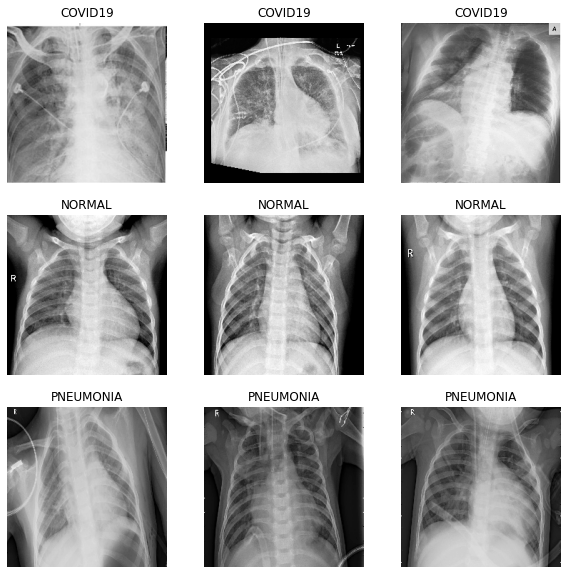

In [6]:
test_path = "C:/Users/tedjo/OneDrive/Pictures/XRays/SplitData/test"

#Create a list of all the images in the test folder
covid19_img = [fn for fn in os.listdir(f'{test_path}/COVID19') if fn.endswith('.jpg')]
normal_img = [fn for fn in os.listdir(f'{test_path}/NORMAL') if fn.endswith('.jpg')]
pneumo_img = [fn for fn in os.listdir(f'{test_path}/PNEUMONIA') if fn.endswith('.jpg')]

#Select 3 random images from each class to display from the test folder
covid_img = np.random.choice(covid19_img, 3, replace = False)
normal_img = np.random.choice(normal_img, 3, replace = False)
pneumo_img = np.random.choice(pneumo_img, 3, replace = False)

#PLot a matrix of the images
fig = plt.figure(figsize=(10,10))
for i in range(9):
    if i <3:
        fp = f'{test_path}/COVID19/{covid_img[i]}'
        label = 'COVID19'
    elif i>=3 and i<6:
        fp = f'{test_path}/NORMAL/{normal_img[i-3]}'
        label = 'NORMAL'
    else:
        fp = f'{test_path}/PNEUMONIA/{pneumo_img[i-6]}'
        label = 'PNEUMONIA'
    ax = fig.add_subplot(3,3,i+1)
    
    #load the image
    fn = image.load_img(fp, target_size=(224,224), color_mode='grayscale')
    plt.imshow(fn,cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

        

Text(0, 0.5, 'Count')

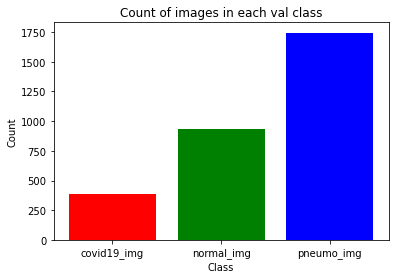

In [7]:
val_path = "C:/Users/tedjo/OneDrive/Pictures/XRays/SplitData/val"
Xray_classes = {'covid19_img': len(os.listdir(f'{val_path}/COVID19')),
                'normal_img': len(os.listdir(f'{val_path}/NORMAL')),
                'pneumo_img': len(os.listdir(f'{val_path}/PNEUMONIA'))}

plt.bar(Xray_classes.keys(), Xray_classes.values(),color=['red','green','blue'])
plt.title('Count of images in each val class')
plt.xlabel('Class')
plt.ylabel('Count')

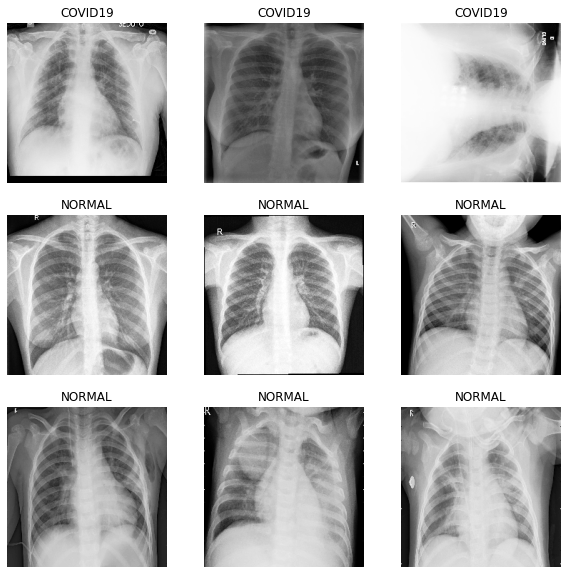

In [8]:
val_path = "C:/Users/tedjo/OneDrive/Pictures/XRays/SplitData/val"
covid19_img = [fn for fn in os.listdir(f'{val_path}/COVID19') if fn.endswith('.jpg')]
normal_img = [fn for fn in os.listdir(f'{val_path}/NORMAL') if fn.endswith('.jpg')]
pneumo_img = [fn for fn in os.listdir(f'{val_path}/PNEUMONIA') if fn.endswith('.jpg')]

covid_img = np.random.choice(covid19_img, 3, replace = False)
normal_img = np.random.choice(normal_img, 3, replace = False)
pneumo_img = np.random.choice(pneumo_img, 3, replace = False)

fig = plt.figure(figsize=(10,10))
for i in range(9):
    if i < 3: 
        fp = f'{val_path}/COVID19/{covid_img[i]}'
        label = 'COVID19'
    elif i>=3 and i<6:
        fp = f'{val_path}/NORMAL/{normal_img[i-3]}'
        label = 'NORMAL'
    else:
        fp = f'{val_path}/PNEUMONIA/{pneumo_img[i-6]}'
        label
    ax  = fig.add_subplot(3,3,i+1)
    fn = image.load_img(fp, target_size=(224,224), color_mode='grayscale')
    plt.imshow(fn,cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

    